<a href="https://colab.research.google.com/github/MoShovon12/SIMS/blob/main/Miami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import pandas as pd



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_excel('dataset.xlsx')
print(df.head())



Saving dataset.xlsx to dataset.xlsx
           PN                           DESCRIPTION  STOCK_LINE  CTRL_NUMBER  \
0      SP90B3                            PIN-COTTER           1       421930   
1  635E949P01                        SLEEVE-FLANGED           3       422371   
2   J205P1100                         RING-RETAINER           2       422371   
3  9938M48G05  ARM ASSY-VANE ACT.CPRSR STTR STG 1&2           2       422371   
4     P263G01          VANE COMPRESSOR STATOR STG 3          13       422371   

   CTRL_ID RECEIVER_NUMBER  QTY_OH  QTY_AVAILABLE  QTY_RESERVED  UNIT_COST  \
0        1            ATIS       4              4             0        0.0   
1       76            ATIS       1              1             0        0.0   
2      251            ATIS       1              1             0        0.0   
3      128            ATIS       1              1             0        0.0   
4      204            ATIS       2              2             0        0.0   

   ...  ATA_RE

In [24]:
for column in df.columns:
    count = df[column].nunique()
    print(f"{column}: {count} unique values")
    print("-" * 40)


PN: 564 unique values
----------------------------------------
DESCRIPTION: 401 unique values
----------------------------------------
STOCK_LINE: 246 unique values
----------------------------------------
CTRL_NUMBER: 640 unique values
----------------------------------------
CTRL_ID: 108 unique values
----------------------------------------
RECEIVER_NUMBER: 650 unique values
----------------------------------------
QTY_OH: 84 unique values
----------------------------------------
QTY_AVAILABLE: 85 unique values
----------------------------------------
QTY_RESERVED: 5 unique values
----------------------------------------
UNIT_COST: 242 unique values
----------------------------------------
EXT_COST: 289 unique values
----------------------------------------
STOCK_CATEGORY_CODE: 13 unique values
----------------------------------------
CONDITION_CODE: 8 unique values
----------------------------------------
SERIAL_NUMBER: 287 unique values
----------------------------------------
SHE

In [ ]:
print(df.info())
print(df.isnull().sum())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   PN                      999 non-null    object        
 1   DESCRIPTION             999 non-null    object        
 2   STOCK_LINE              999 non-null    int64         
 3   CTRL_NUMBER             999 non-null    int64         
 4   CTRL_ID                 999 non-null    int64         
 5   RECEIVER_NUMBER         999 non-null    object        
 6   QTY_OH                  999 non-null    int64         
 7   QTY_AVAILABLE           999 non-null    int64         
 8   QTY_RESERVED            999 non-null    int64         
 9   UNIT_COST               999 non-null    float64       
 10  EXT_COST                999 non-null    float64       
 11  STOCK_CATEGORY_CODE     973 non-null    object        
 12  CONDITION_CODE          999 non-null    object    

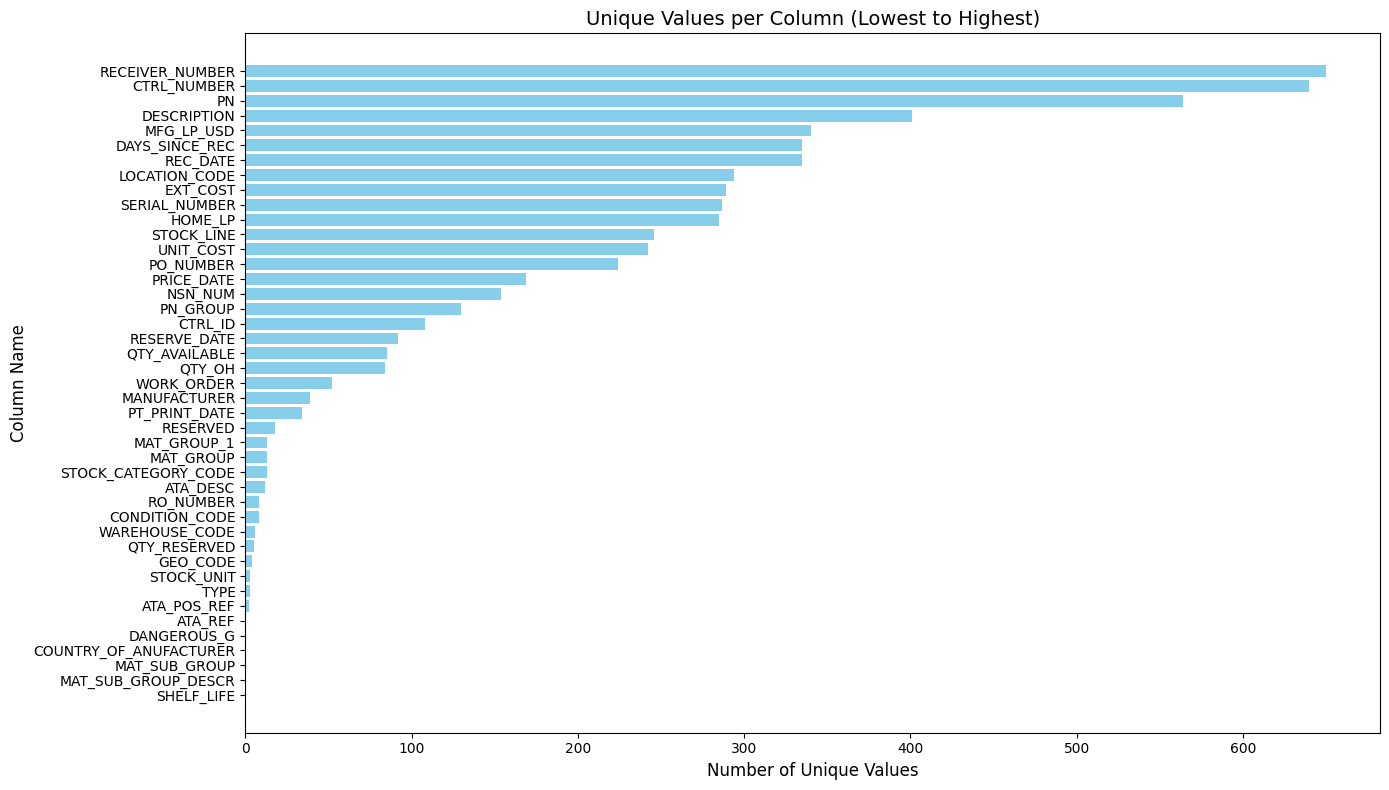

In [25]:
# Count unique values per column
unique_counts = {col: df[col].nunique() for col in df.columns}

# Convert to DataFrame and sort by unique value count (ascending)
unique_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
unique_df = unique_df.sort_values(by='Unique Values', ascending=True)

# Plot as bar chart with increased size
plt.figure(figsize=(14, 8))  # Increase size here
plt.barh(unique_df['Column'], unique_df['Unique Values'], color='skyblue')
plt.xlabel('Number of Unique Values', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.title('Unique Values per Column (Lowest to Highest)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
def detect_column_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return "Numerical"
    elif pd.api.types.is_string_dtype(series):
        return "String"
    else:
        # For mixed or other types, let's check if values are mixed
        types = series.map(type).unique()
        if len(types) > 1:
            return "Mixed"
        else:
            # fallback: categorize based on first type
            t = types[0]
            if issubclass(t, (int, float)):
                return "Numerical"
            elif issubclass(t, str):
                return "String"
            else:
                return "Other"

column_types = {col: detect_column_type(df[col]) for col in df.columns}
print(column_types)


{'PN': 'String', 'DESCRIPTION': 'String', 'STOCK_LINE': 'Numerical', 'CTRL_NUMBER': 'Numerical', 'CTRL_ID': 'Numerical', 'RECEIVER_NUMBER': 'String', 'QTY_OH': 'Numerical', 'QTY_AVAILABLE': 'Numerical', 'QTY_RESERVED': 'Numerical', 'UNIT_COST': 'Numerical', 'EXT_COST': 'Numerical', 'STOCK_CATEGORY_CODE': 'Mixed', 'CONDITION_CODE': 'String', 'SERIAL_NUMBER': 'Mixed', 'SHELF_LIFE': 'Numerical', 'LOCATION_CODE': 'String', 'WAREHOUSE_CODE': 'String', 'RESERVED': 'Mixed', 'DAYS_SINCE_REC': 'Numerical', 'REC_DATE': 'Mixed', 'GEO_CODE': 'Mixed', 'RO_NUMBER': 'Mixed', 'PO_NUMBER': 'Mixed', 'WORK_ORDER': 'Mixed', 'RESERVE_DATE': 'Mixed', 'PT_PRINT_DATE': 'Mixed', 'MAT_GROUP': 'Numerical', 'TYPE': 'String', 'MAT_SUB_GROUP': 'Numerical', 'MAT_SUB_GROUP_DESCR': 'Numerical', 'COUNTRY_OF_ANUFACTURER': 'Numerical', 'ATA_POS_REF': 'Mixed', 'MANUFACTURER': 'String', 'ATA_REF': 'Numerical', 'ATA_DESC': 'Numerical', 'PN_GROUP': 'String', 'PRICE_DATE': 'Mixed', 'HOME_LP': 'Numerical', 'MFG_LP_USD': 'Numer

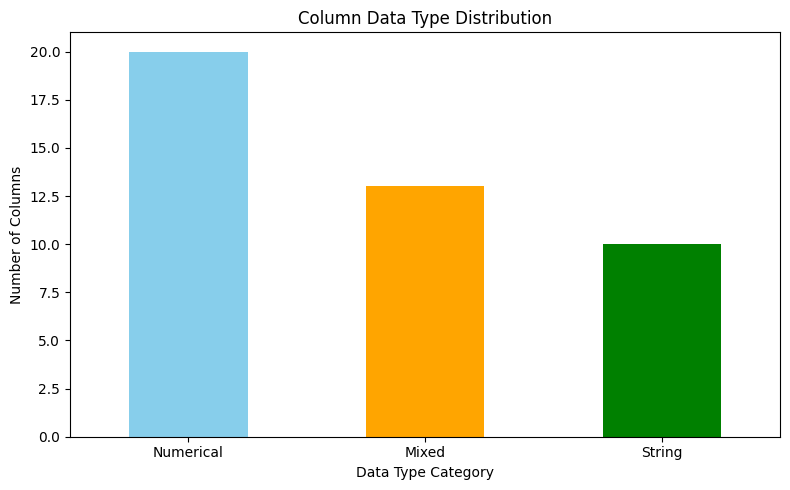

In [ ]:

# Count how many columns are in each type category
type_counts = pd.Series(list(column_types.values())).value_counts()

# Plot
plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'grey'])
plt.xlabel('Data Type Category')
plt.ylabel('Number of Columns')
plt.title('Column Data Type Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
duplicates = df.groupby("DESCRIPTION").filter(lambda x: x["PN"].nunique() > 1)
duplicates_sorted = duplicates.sort_values("DESCRIPTION")
print(duplicates_sorted[["PN", "DESCRIPTION"]])

                PN         DESCRIPTION
257      121664-10  ACTUATOR-BALLSCREW
622      121664-10  ACTUATOR-BALLSCREW
258      121664-10  ACTUATOR-BALLSCREW
225       121664-3  ACTUATOR-BALLSCREW
623      121664-10  ACTUATOR-BALLSCREW
..             ...                 ...
236  301-537-803-0          WASHER-KEY
245  301-298-408-0          WASHER-KEY
222     9513M61P03      WEIGHT-BALANCE
322     9524M50P06      WEIGHT-BALANCE
800     9513M62P04      WEIGHT-BALANCE

[527 rows x 2 columns]


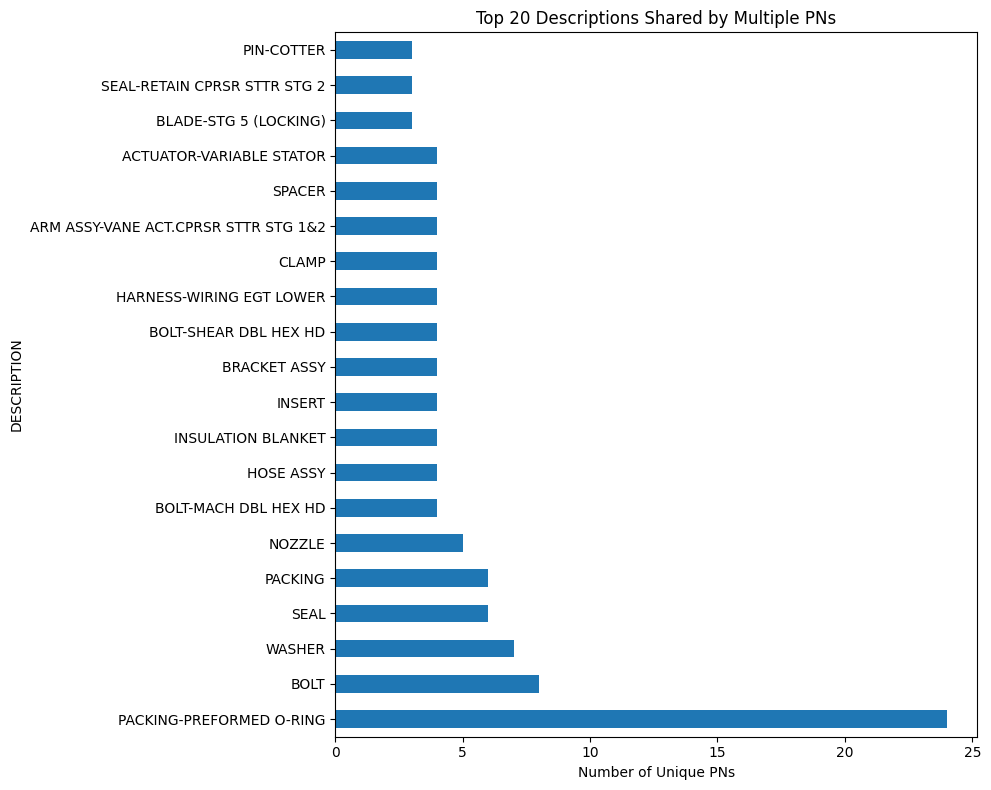

In [ ]:
# Count unique PNs per DESCRIPTION
shared_desc = (df.groupby("DESCRIPTION")["PN"]
                 .nunique()
                 .reset_index(name="Unique_PN_Count"))

# Filter only descriptions with >1 PN
shared_desc = shared_desc[shared_desc["Unique_PN_Count"] > 1]

# Sort and plot
shared_desc.sort_values("Unique_PN_Count", ascending=False).head(20).plot(
    kind="barh", x="DESCRIPTION", y="Unique_PN_Count", figsize=(10, 8), legend=False)

plt.xlabel("Number of Unique PNs")
plt.ylabel("DESCRIPTION")
plt.title("Top 20 Descriptions Shared by Multiple PNs")
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Write a code to analyze PN and Pn group co relation

# Load the dataframe if it's not already loaded (useful if running this cell independently)
try:
    df.head()
except NameError:
    dataset="miami.csv"
    df = pd.read_excel(miami)


# Analyze correlation between PN and Pn groups
# We'll assume 'PN' and 'Pn group' are columns in the dataframe.
# First, let's identify the columns related to 'PN' and 'Pn group'.
# Based on the previous code, 'PN' is likely a column.
# Let's look for a column named 'Pn group' or similar.
# If 'Pn group' is not a direct column name, we need to understand how it is defined
# or if it needs to be created from existing data.
# Assuming there is a column directly or indirectly representing 'Pn group'.

# Let's assume there's a column named 'PN_GROUP' in the dataframe `df`.
# If the 'PN_GROUP' column does not exist or has a different name,
# you'll need to adjust the column name below.
pn_group_column_name = 'PN_GROUP' # Replace with the actual column name

if pn_group_column_name in df.columns and 'PN' in df.columns:
    # For correlation, we need numerical data.
    # If 'PN' or 'PN_GROUP' are not numerical, we might need to encode them.
    # Let's check the data types first.
    print(f"Data type of 'PN': {df['PN'].dtype}")
    print(f"Data type of '{pn_group_column_name}': {df[pn_group_column_name].dtype}")

    # If both are numerical, we can calculate the Pearson correlation.
    if pd.api.types.is_numeric_dtype(df['PN']) and pd.api.types.is_numeric_dtype(df[pn_group_column_name]):
        correlation = df['PN'].corr(df[pn_group_column_name])
        print(f"\nPearson correlation between 'PN' and '{pn_group_column_name}': {correlation}")

        # Visualize correlation with a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df['PN'], df[pn_group_column_name], alpha=0.5)
        plt.xlabel('PN')
        plt.ylabel(pn_group_column_name)
        plt.title(f'Scatter plot of PN vs {pn_group_column_name}')
        plt.grid(True)
        plt.show()

    # If they are categorical or mixed, we need a different approach.
    # One way is to use encoding (e.g., One-Hot Encoding) and then calculate correlation,
    # but this might not be meaningful depending on the data.
    # A better approach for categorical/mixed data might be:
    # 1. Analyzing the distribution of 'PN_GROUP' for each 'PN'.
    # 2. Using contingency tables and chi-squared tests if both are categorical.
    # 3. Using ANOVA if 'PN' is numerical and 'PN_GROUP' is categorical.

    elif df['PN'].dtype == 'object' or df[pn_group_column_name].dtype == 'object':
        print("\n'PN' or 'PN_GROUP' is not numerical. Calculating correlation requires numerical data.")
        print("Analyzing relationships for non-numerical data:")

        # Example: Analyze the distribution of 'PN_GROUP' for frequent 'PN' values
        # Get top N frequent PNs
        top_n_pn = df['PN'].value_counts().nlargest(10).index.tolist()

        print(f"\nAnalyzing PN GROUP distribution for top 10 PNs:")
        for pn_value in top_n_pn:
            subset_df = df[df['PN'] == pn_value]
            pn_group_distribution = subset_df[pn_group_column_name].value_counts(normalize=True) * 100
            print(f"PN: {pn_value}")
            print(pn_group_distribution)
            print("-" * 20)

        # If both are categorical, consider a contingency table and chi-squared test
        if df['PN'].dtype == 'object' and df[pn_group_column_name].dtype == 'object':
            print(f"\nCreating a contingency table between 'PN' and '{pn_group_column_name}':")
            contingency_table = pd.crosstab(df['PN'], df[pn_group_column_name])
            print(contingency_table.head()) # Print head as table can be large

            # Perform Chi-squared test (requires scipy)
            try:
                from scipy.stats import chi2_contingency
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                print(f"\nChi-squared test results for independence of 'PN' and '{pn_group_column_name}':")
                print(f"Chi-squared statistic: {chi2:.2f}")
                print(f"P-value: {p:.4f}")
                print("A small p-value suggests dependency between the variables.")
            except ImportError:
                print("\nInstall scipy for Chi-squared test: !pip install scipy")
            except ValueError as e:
                print(f"\nCould not perform Chi-squared test. Reason: {e}")
                print("This might happen if the contingency table has many zero entries.")

    else:
        print(f"\nCannot directly calculate correlation between 'PN' and '{pn_group_column_name}' due to data types.")
        print("Consider appropriate statistical tests or visualizations based on the specific types.")

else:
    print(f"\nCould not find 'PN' and/or '{pn_group_column_name}' columns in the dataframe.")
    print("Please check column names.")
    print("Available columns:", df.columns.tolist())

# Note: This code assumes the column 'PN_GROUP' exists.
# If your 'Pn group' is defined differently (e.g., derived from other columns),
# you need to add the code to create that 'PN_GROUP' column first.
# For example, if 'Pn group' is derived from 'DESCRIPTION':
# df['PN_GROUP'] = df['DESCRIPTION'].apply(lambda x: 'Group A' if 'keyword' in x else 'Group B')
# Or if it's based on ranges of 'PN' (if PN is numerical):
# bins = [0, 100, 500, float('inf')]
# labels = ['Group 1', 'Group 2', 'Group 3']
# df['PN_GROUP'] = pd.cut(df['PN'], bins=bins, labels=labels, right=False)

NameError: name 'pd' is not defined

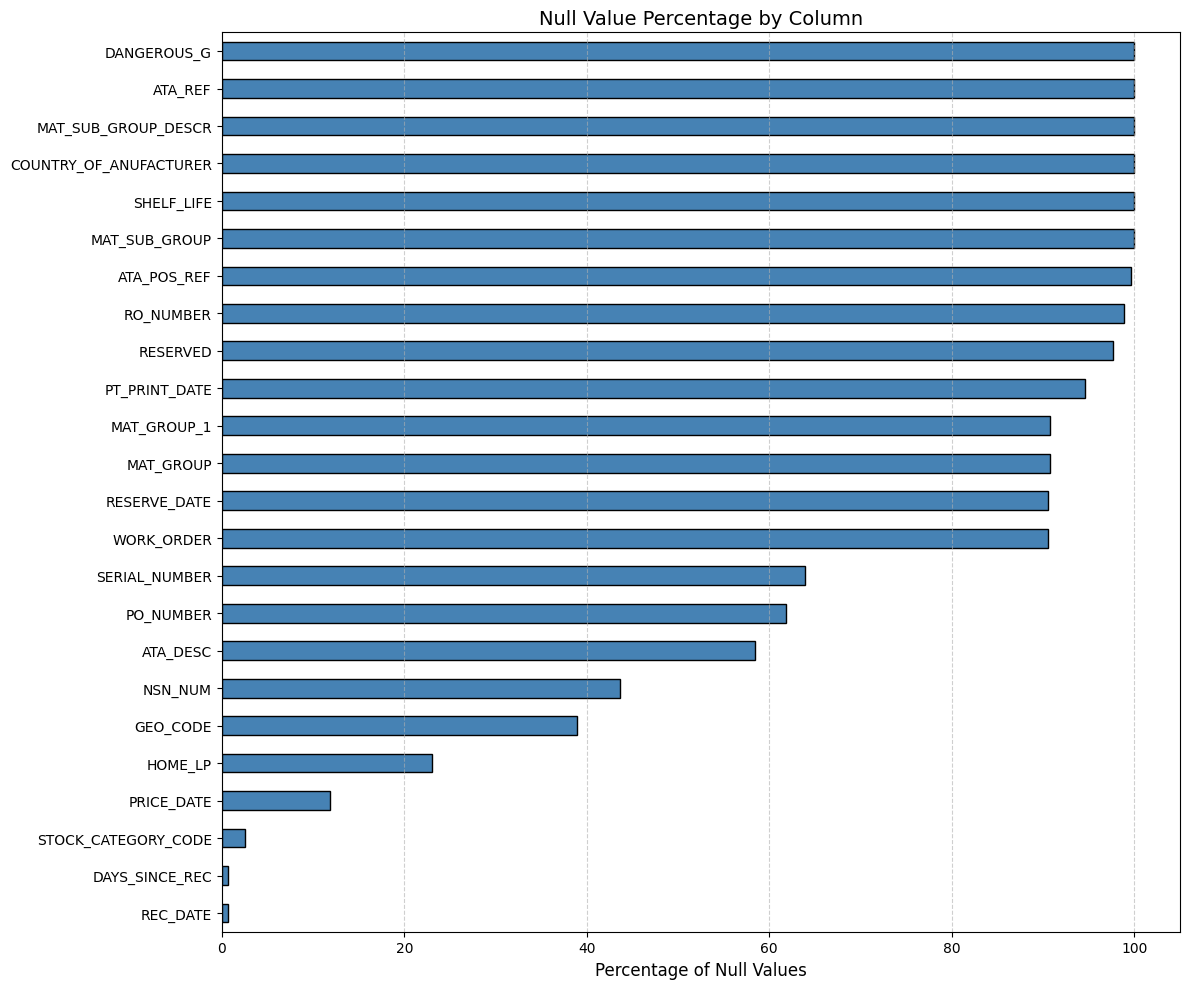

In [26]:
# Calculate null percentage per column
null_percent = df.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 10))
null_percent.plot(kind='barh', color='steelblue', edgecolor='black')

# Formatting
plt.xlabel('Percentage of Null Values', fontsize=12)
plt.title('Null Value Percentage by Column', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

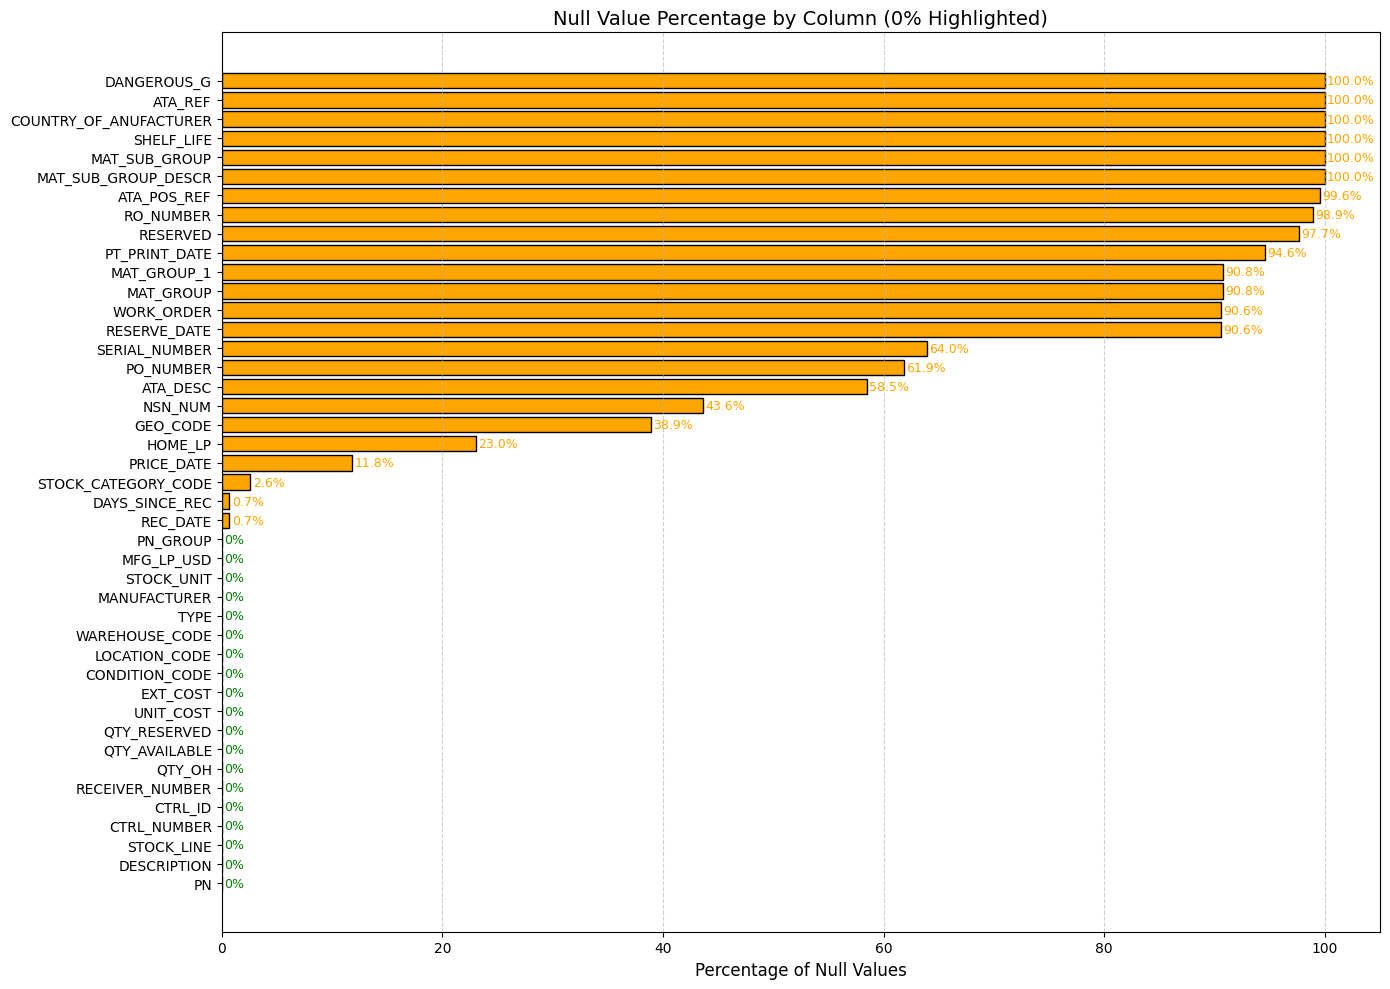

In [27]:
# Calculate null percentages
null_percent = df.isnull().mean() * 100
null_percent_sorted = null_percent.sort_values(ascending=True)

# Define colors
colors = ['green' if pct == 0 else 'orange' for pct in null_percent_sorted]

# Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(null_percent_sorted.index, null_percent_sorted.values, color=colors, edgecolor='black')

# Annotate 0% columns
for bar, pct in zip(bars, null_percent_sorted.values):
    if pct == 0:
        plt.text(pct + 0.2, bar.get_y() + bar.get_height()/2, '0%', va='center', ha='left', fontsize=9, color='green')
    elif pct > 0:
        plt.text(pct + 0.2, bar.get_y() + bar.get_height()/2, f'{pct:.1f}%', va='center', ha='left', fontsize=9, color='orange')

# Labels and formatting
plt.xlabel('Percentage of Null Values', fontsize=12)
plt.title('Null Value Percentage by Column (0% Highlighted)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

/tmp/ipython-input-31-55684005.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn_r')


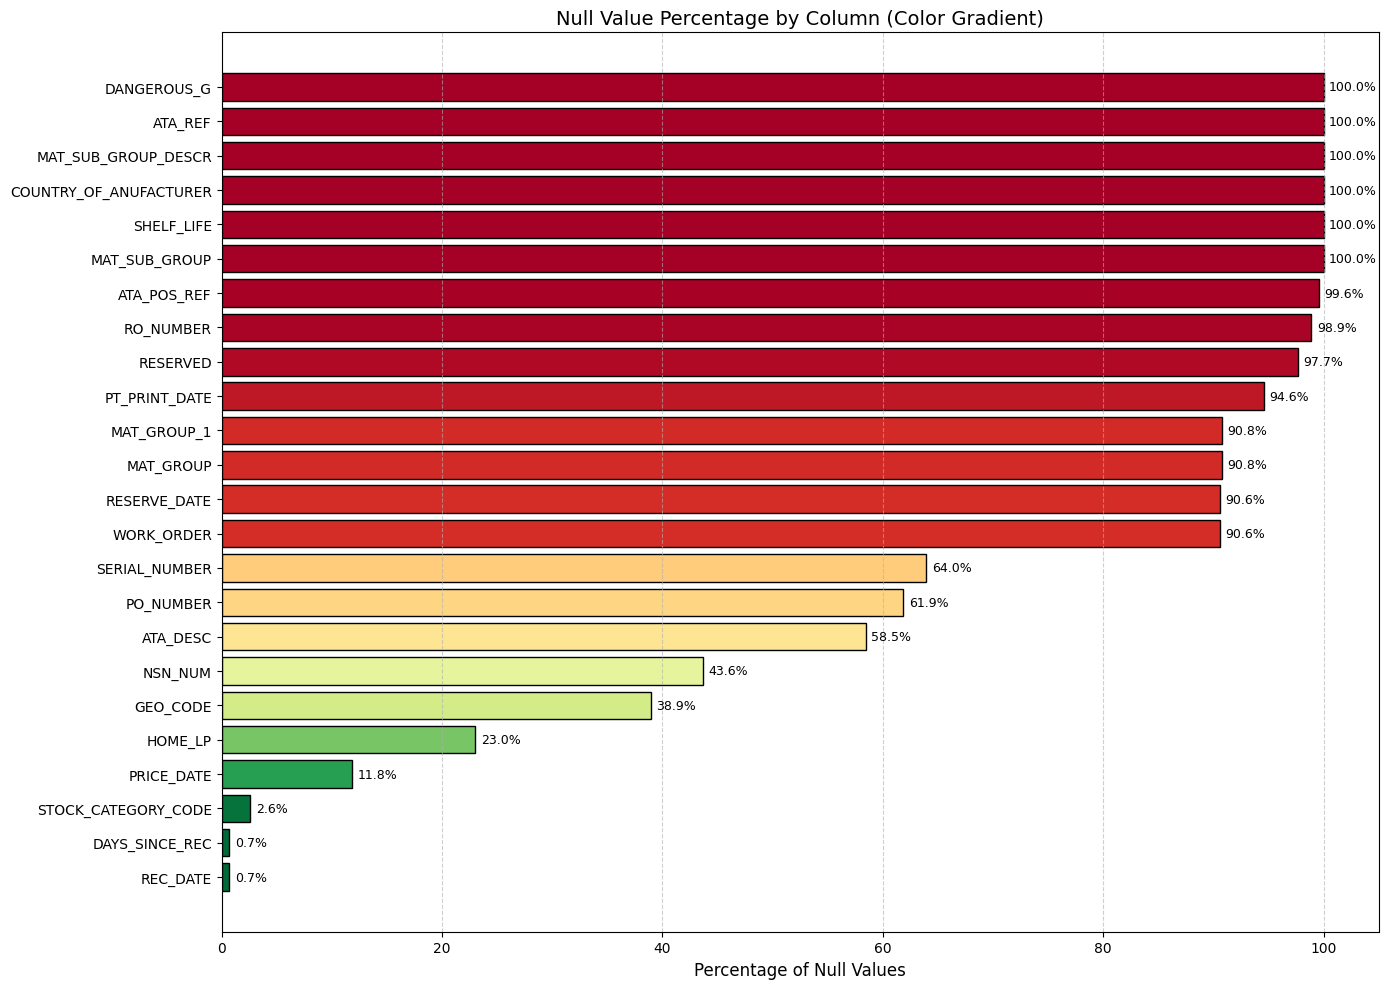

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

null_percent = df.isnull().mean() * 100
has_null_columns = null_percent[null_percent > 0].index.tolist()
df_with_nulls = df[has_null_columns].copy()

# Calculate null percentages for df_with_nulls
null_percent = df_with_nulls.isnull().mean() * 100
null_percent_sorted = null_percent.sort_values(ascending=True)

# Normalize the null % values between 0 and 100
norm = Normalize(vmin=0, vmax=100)

# Use a colormap: 'RdYlGn_r' goes from red (high) to green (low)
cmap = cm.get_cmap('RdYlGn_r')

# Generate colors based on null % using the colormap
colors = [cmap(norm(pct)) for pct in null_percent_sorted.values]

# Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(null_percent_sorted.index, null_percent_sorted.values, color=colors, edgecolor='black')

# Annotate bars with percentage text
for bar, pct in zip(bars, null_percent_sorted.values):
    plt.text(pct + 0.5, bar.get_y() + bar.get_height()/2, f'{pct:.1f}%',
             va='center', ha='left', fontsize=9, color='black')

# Labels and formatting
plt.xlabel('Percentage of Null Values', fontsize=12)
plt.title('Null Value Percentage by Column (Color Gradient)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [32]:
def detect_column_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return "Numerical"
    elif pd.api.types.is_string_dtype(series):
        return "String"
    else:
        # For mixed or other types, let's check if values are mixed
        types = series.map(type).unique()
        if len(types) > 1:
            return "Mixed"
        else:
            # fallback: categorize based on first type
            t = types[0]
            if issubclass(t, (int, float)):
                return "Numerical"
            elif issubclass(t, str):
                return "String"
            else:
                return "Other"

column_types = {col: detect_column_type(df[col]) for col in df.columns}
print(column_types)

{'PN': 'String', 'DESCRIPTION': 'String', 'STOCK_LINE': 'Numerical', 'CTRL_NUMBER': 'Numerical', 'CTRL_ID': 'Numerical', 'RECEIVER_NUMBER': 'String', 'QTY_OH': 'Numerical', 'QTY_AVAILABLE': 'Numerical', 'QTY_RESERVED': 'Numerical', 'UNIT_COST': 'Numerical', 'EXT_COST': 'Numerical', 'STOCK_CATEGORY_CODE': 'Mixed', 'CONDITION_CODE': 'String', 'SERIAL_NUMBER': 'Mixed', 'SHELF_LIFE': 'Numerical', 'LOCATION_CODE': 'String', 'WAREHOUSE_CODE': 'String', 'RESERVED': 'Mixed', 'DAYS_SINCE_REC': 'Numerical', 'REC_DATE': 'Mixed', 'GEO_CODE': 'Mixed', 'RO_NUMBER': 'Mixed', 'PO_NUMBER': 'Mixed', 'WORK_ORDER': 'Mixed', 'RESERVE_DATE': 'Mixed', 'PT_PRINT_DATE': 'Mixed', 'MAT_GROUP': 'Numerical', 'TYPE': 'String', 'MAT_SUB_GROUP': 'Numerical', 'MAT_SUB_GROUP_DESCR': 'Numerical', 'COUNTRY_OF_ANUFACTURER': 'Numerical', 'ATA_POS_REF': 'Mixed', 'MANUFACTURER': 'String', 'ATA_REF': 'Numerical', 'ATA_DESC': 'Numerical', 'PN_GROUP': 'String', 'PRICE_DATE': 'Mixed', 'HOME_LP': 'Numerical', 'MFG_LP_USD': 'Numer

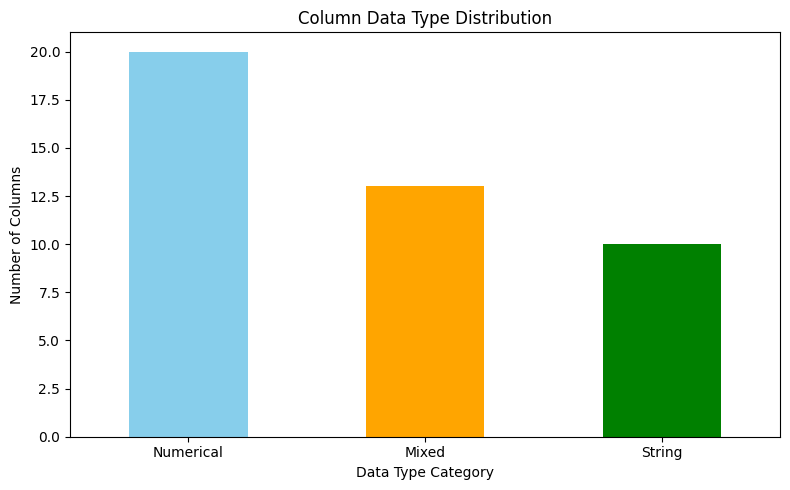

In [33]:


# Count how many columns are in each type category
type_counts = pd.Series(list(column_types.values())).value_counts()

# Plot
plt.figure(figsize=(8,5))
type_counts.plot(kind='bar', color=['skyblue', 'orange', 'green', 'grey'])
plt.xlabel('Data Type Category')
plt.ylabel('Number of Columns')
plt.title('Column Data Type Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [34]:

duplicates = df.groupby("DESCRIPTION").filter(lambda x: x["PN"].nunique() > 1)
duplicates_sorted = duplicates.sort_values("DESCRIPTION")
print(duplicates_sorted[["PN", "DESCRIPTION"]])

                PN         DESCRIPTION
257      121664-10  ACTUATOR-BALLSCREW
622      121664-10  ACTUATOR-BALLSCREW
258      121664-10  ACTUATOR-BALLSCREW
225       121664-3  ACTUATOR-BALLSCREW
623      121664-10  ACTUATOR-BALLSCREW
..             ...                 ...
236  301-537-803-0          WASHER-KEY
245  301-298-408-0          WASHER-KEY
222     9513M61P03      WEIGHT-BALANCE
322     9524M50P06      WEIGHT-BALANCE
800     9513M62P04      WEIGHT-BALANCE

[527 rows x 2 columns]


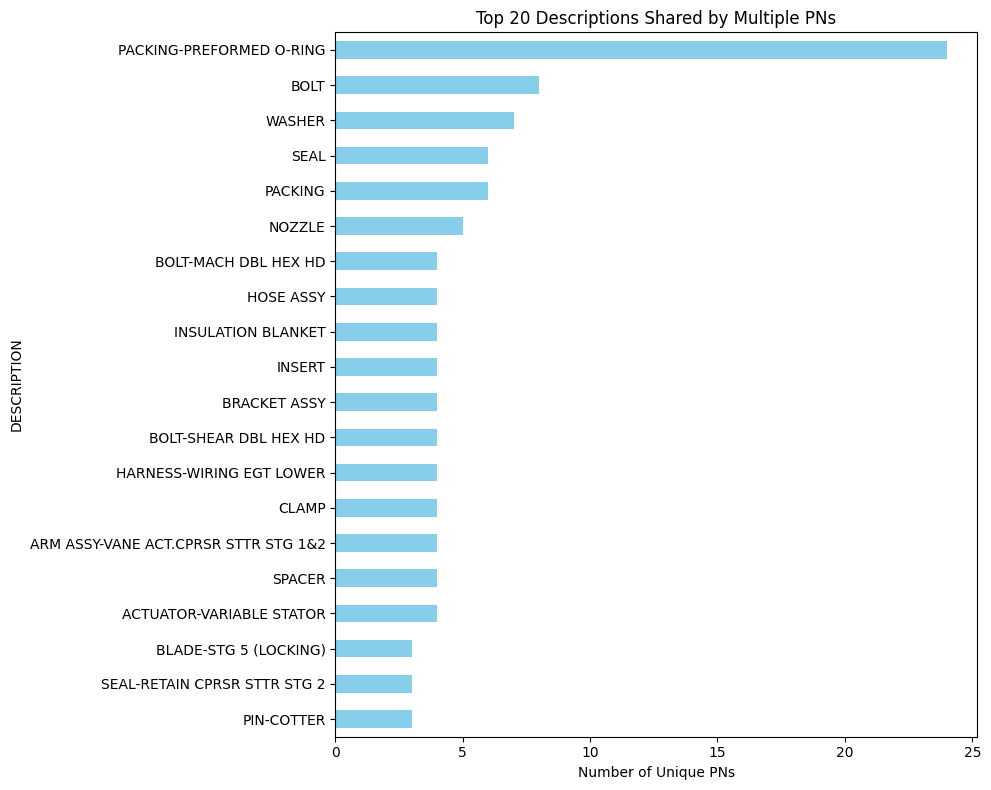

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

shared_desc = (
    df.groupby("DESCRIPTION")["PN"]
      .nunique()
      .reset_index(name="Unique_PN_Count")
)

# Step 2: Filter only descriptions with >1 PN
shared_desc = shared_desc[shared_desc["Unique_PN_Count"] > 1]

# Step 3: Sort and select top 20, then reverse to show highest at top
top_shared_desc = shared_desc.sort_values("Unique_PN_Count", ascending=False).head(20)[::-1]

# Step 4: Plot horizontal bar chart
top_shared_desc.plot(
    kind="barh",
    x="DESCRIPTION",
    y="Unique_PN_Count",
    figsize=(10, 8),
    legend=False,
    color="skyblue"
)

# Step 5: Customize plot
plt.xlabel("Number of Unique PNs")
plt.ylabel("DESCRIPTION")
plt.title("Top 20 Descriptions Shared by Multiple PNs")
plt.tight_layout()
plt.show()


In [36]:

null_percent = df.isnull().mean() * 100

# Columns with 0% null values
no_null_columns = null_percent[null_percent == 0].index.tolist()

# Columns with >0% null values
has_null_columns = null_percent[null_percent > 0].index.tolist()

# New DataFrames
df_no_nulls = df[no_null_columns].copy()
df_with_nulls = df[has_null_columns].copy()

# Optional: check shapes
print(f'DataFrame with no null columns shape: {df_no_nulls.shape}')
print(f'DataFrame with null columns shape: {df_with_nulls.shape}')

DataFrame with no null columns shape: (999, 19)
DataFrame with null columns shape: (999, 24)


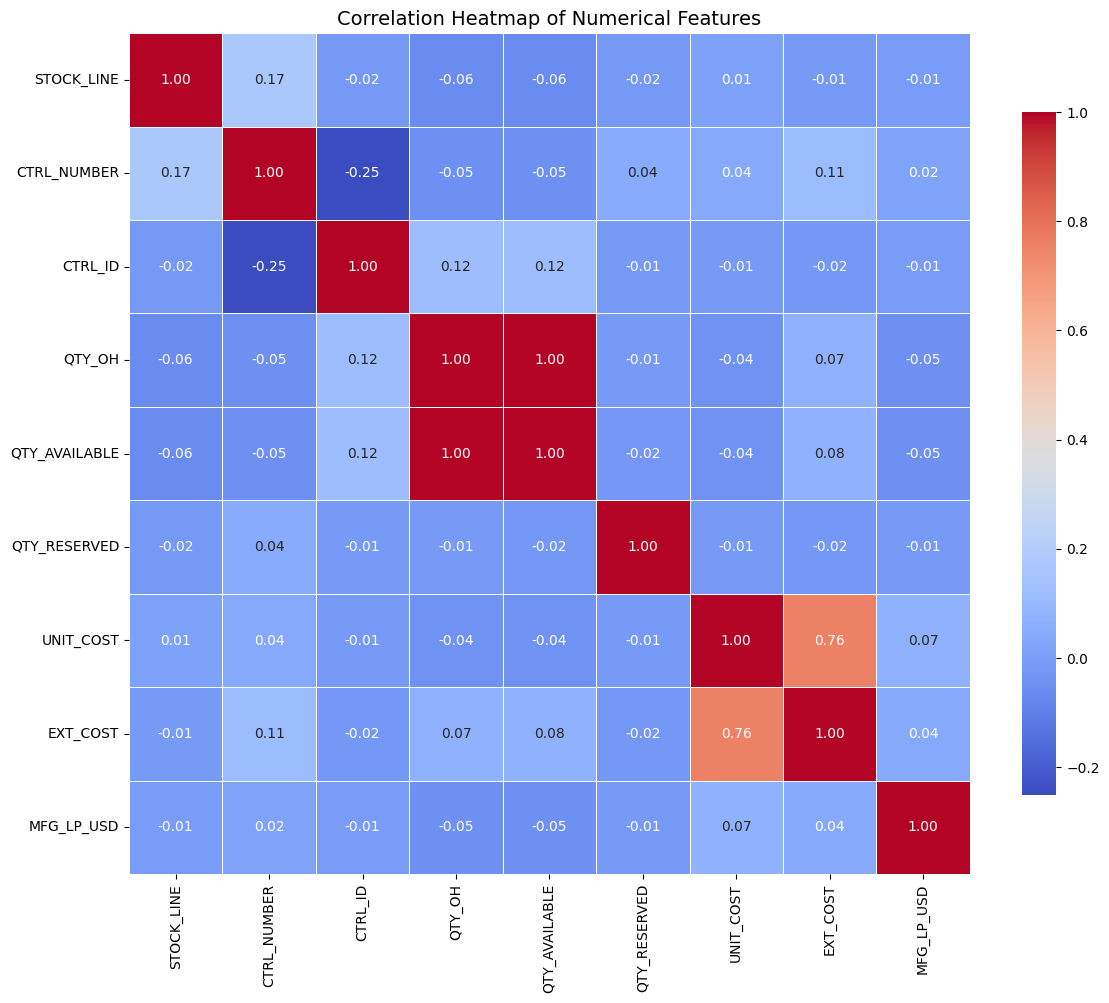

In [37]:
numeric_df = df_no_nulls.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,         # Show correlation coefficients
            fmt=".2f",          # Format to 2 decimal places
            cmap='coolwarm',    # Color palette
            square=True,        # Square cells
            linewidths=0.5,     # Grid lines
            cbar_kws={'shrink': 0.8})  # Colorbar size

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

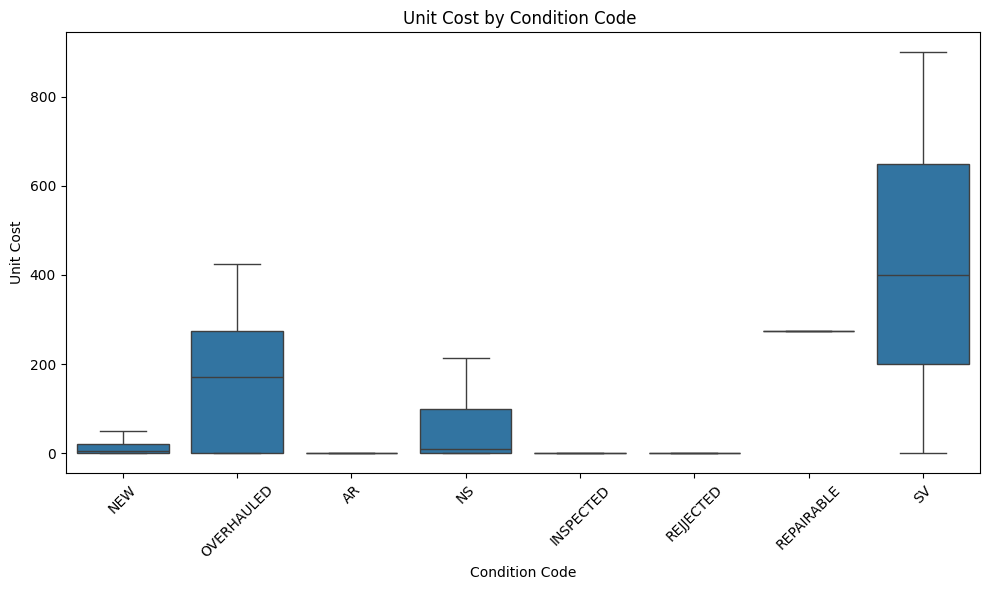

In [38]:
plt.figure(figsize=(10, 6))  # Increase plot size if needed
sns.boxplot(x='CONDITION_CODE', y='UNIT_COST', data=df_no_nulls, showfliers=False)

plt.title("Unit Cost by Condition Code ")
plt.xlabel("Condition Code")
plt.ylabel("Unit Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

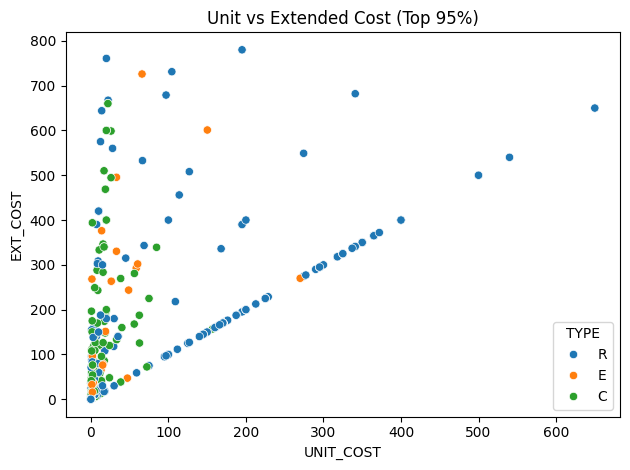

In [39]:
filtered_df = df_no_nulls[df_no_nulls['EXT_COST'] < df_no_nulls['EXT_COST'].quantile(0.95)]
sns.scatterplot(x='UNIT_COST', y='EXT_COST', hue='TYPE', data=filtered_df)
plt.title("Unit vs Extended Cost (Top 95%)")
plt.tight_layout()
plt.show()


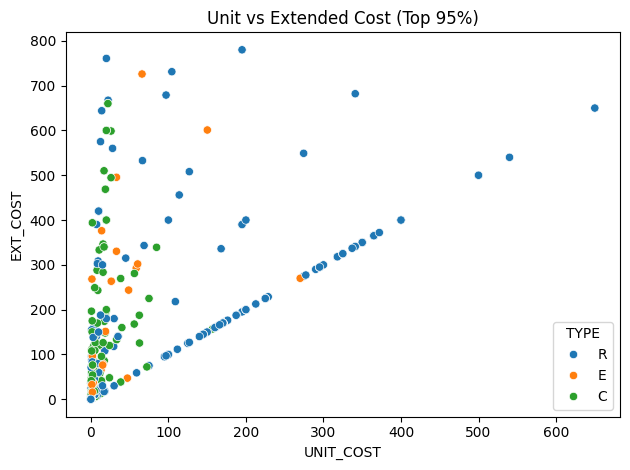

In [40]:
filtered_df = df_no_nulls[df_no_nulls['EXT_COST'] < df_no_nulls['EXT_COST'].quantile(0.95)]
sns.scatterplot(x='UNIT_COST', y='EXT_COST', hue='TYPE', data=filtered_df)
plt.title("Unit vs Extended Cost (Top 95%)")
plt.tight_layout()
plt.show()


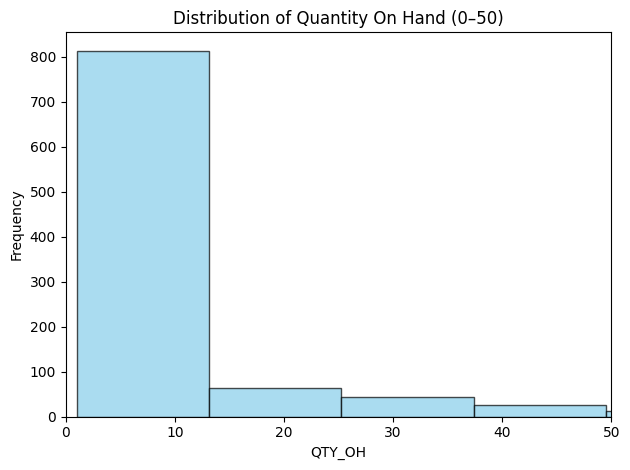

In [41]:
df_no_nulls['QTY_OH'].plot.hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')

plt.title("Distribution of Quantity On Hand (0–50)")
plt.xlabel("QTY_OH")
plt.xlim(0, 50)  # Set X-axis range from 0 to 50
plt.tight_layout()
plt.show()